#### Credit-Card Customer Segmentation 

**Goal**: Segment credit card customers based on spending patterns and repayment behavior to help businesses design targeted offers, improve retention, and detect risky customers.

In [265]:
#Importing all necessary libraries
import os                                         
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [266]:
# Downloading the dataset from Kaggle
# ! kaggle datasets download arjunbhasin2013/ccdata

In [267]:
# Extracting the all files from the zip folder
try:
    with zipfile.ZipFile('ccdata.zip','r') as file:
        file.extractall()
        print('Executed')
except :
    print(FileNotFoundError)
    

Executed


In [268]:
DATA_PATH='CC GENERAL.csv'

In [269]:
#Function to check the source path does exist or not. If path exist the it will read the csv and  return the dataframe else it will raise an error.
def load_data(path=DATA_PATH):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Data file not found at {path}.")
    df = pd.read_csv(path)
    print(f"Loaded data: {df.shape[0]} rows, {df.shape[1]} columns")
    return df


In [270]:
# Reading the dataset with pandas
df=load_data(DATA_PATH)

Loaded data: 8950 rows, 18 columns


In [271]:
df.shape

(8950, 18)

In [272]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

The dataset contains 18 features and 8950 records

In [273]:
#Extracting the besic information of the dataset
def data_report(dataframe):
    print(dataframe.info())
    print("\nFirst rows:\n", dataframe.head())

In [274]:
data_report(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data Set Explanation:
The dataset contains the information of custoemr's credit card usages. It's contains total 18 columns and 8950 rows. The columns are as follows:
- **CUST_ID**: Unique identifier for each customer.
- **BALANCE**: Current balance on the credit card.      
- **BALANCE_FREQUENCY**: Frequency of balance updates on-go. If the value is 1 then it updated frequently, if 0 then not updated frequently.
- **PURCHASES**: Total amount of purchases made by the customer.
- **ONEOFF_PURCHASES**: The highest amount of perchase in one-go.
- **INSTALLMENTS_PURCHASES**: The perchase amount on installments.
- **CASH_ADVANCE**: Advanced cash given by the customer.
- **PURCHASES_FREQUENCY**: How freuently the custmer did perchase any product. If it's 1 then the coustomer purchase frequently, if it's 0 then don't. 
- **ONEOFF_PURCHASES_FREQUENCY** : How frequently the customer make one time purchase. If it's 1 then the customer do frequently, if it's 0 then he don't.
- **PURCHASES_INSTALLMENTS_FREQUENCY**: The frequency of purchesing product on installments. If it's 1 then the customer do frequently, if it's 0 then he don't.
- **CASH_ADVANCE_FREQUENCY**: The frequency of purchesing product on advanced payment. If it's 1 then the customer do frequently, if it's 0 then he don't.
- **CASH_ADVANCE_TRX**: Number of transactions done with "Cash in Advanced" .
- **PURCHASES_TRX** :The number of transactions made with peoduct purchase.
- **CREDIT_LIMIT**: Maximum limit can be purchas through credit card.
- **PAYMENTS**: Amount of payment done by user.
- **MINIMUM_PAYMENTS**: The minimum amount of purchase done by user.
- **PRC_FULL_PAYMENT** : Percentage of full Payment paid by user.
- **TENURE** :The duration within which user must repay the borrowed amount along with interest

In [275]:
#Statistical summary of the dataset
df.describe().T.style.background_gradient(cmap="YlGnBu")

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.000000,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


This makes it visually clear which columns have high variance, outliers, or skewness.

In [276]:
# Checking for missing values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In our dataset, 313 values are missing in the MINIMUM_PAYMENTS column, and 1 value is missing in the CREDIT_LIMIT column

In [277]:
# Filling the empty cells with the median value 
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

The data contains outlier. So, it's better to fill the empty values with median insted mean. Because, the outliers does't effect the median.

In [278]:
# Rechecking that all null values got removed or not
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [279]:
#Droping duplicates if exits
df['CUST_ID'].drop_duplicates()

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

## Exploratry Data Analysis

In [280]:
#Getting idea about the maximum values of each features
df.max()

CUST_ID                                  C19190
BALANCE                             19043.13856
BALANCE_FREQUENCY                           1.0
PURCHASES                              49039.57
ONEOFF_PURCHASES                       40761.25
INSTALLMENTS_PURCHASES                  22500.0
CASH_ADVANCE                        47137.21176
PURCHASES_FREQUENCY                         1.0
ONEOFF_PURCHASES_FREQUENCY                  1.0
PURCHASES_INSTALLMENTS_FREQUENCY            1.0
CASH_ADVANCE_FREQUENCY                      1.5
CASH_ADVANCE_TRX                            123
PURCHASES_TRX                               358
CREDIT_LIMIT                            30000.0
PAYMENTS                            50721.48336
MINIMUM_PAYMENTS                    76406.20752
PRC_FULL_PAYMENT                            1.0
TENURE                                       12
dtype: object

Interesting Insights:

- The highest Balance is 19,043.14.

- The maximum Purchase Amount is 49,039.57.

- The maximum One-off Purchase Amount is 40,761.25.

- The maximum Installment Purchase Amount is 22,500.00.

- The maximum Cash Advance is 47,137.21.

- The maximum Credit Limit is 30,000.00.

In [281]:
df.min()

CUST_ID                               C10001
BALANCE                                  0.0
BALANCE_FREQUENCY                        0.0
PURCHASES                                0.0
ONEOFF_PURCHASES                         0.0
INSTALLMENTS_PURCHASES                   0.0
CASH_ADVANCE                             0.0
PURCHASES_FREQUENCY                      0.0
ONEOFF_PURCHASES_FREQUENCY               0.0
PURCHASES_INSTALLMENTS_FREQUENCY         0.0
CASH_ADVANCE_FREQUENCY                   0.0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
CREDIT_LIMIT                            50.0
PAYMENTS                                 0.0
MINIMUM_PAYMENTS                    0.019163
PRC_FULL_PAYMENT                         0.0
TENURE                                     6
dtype: object

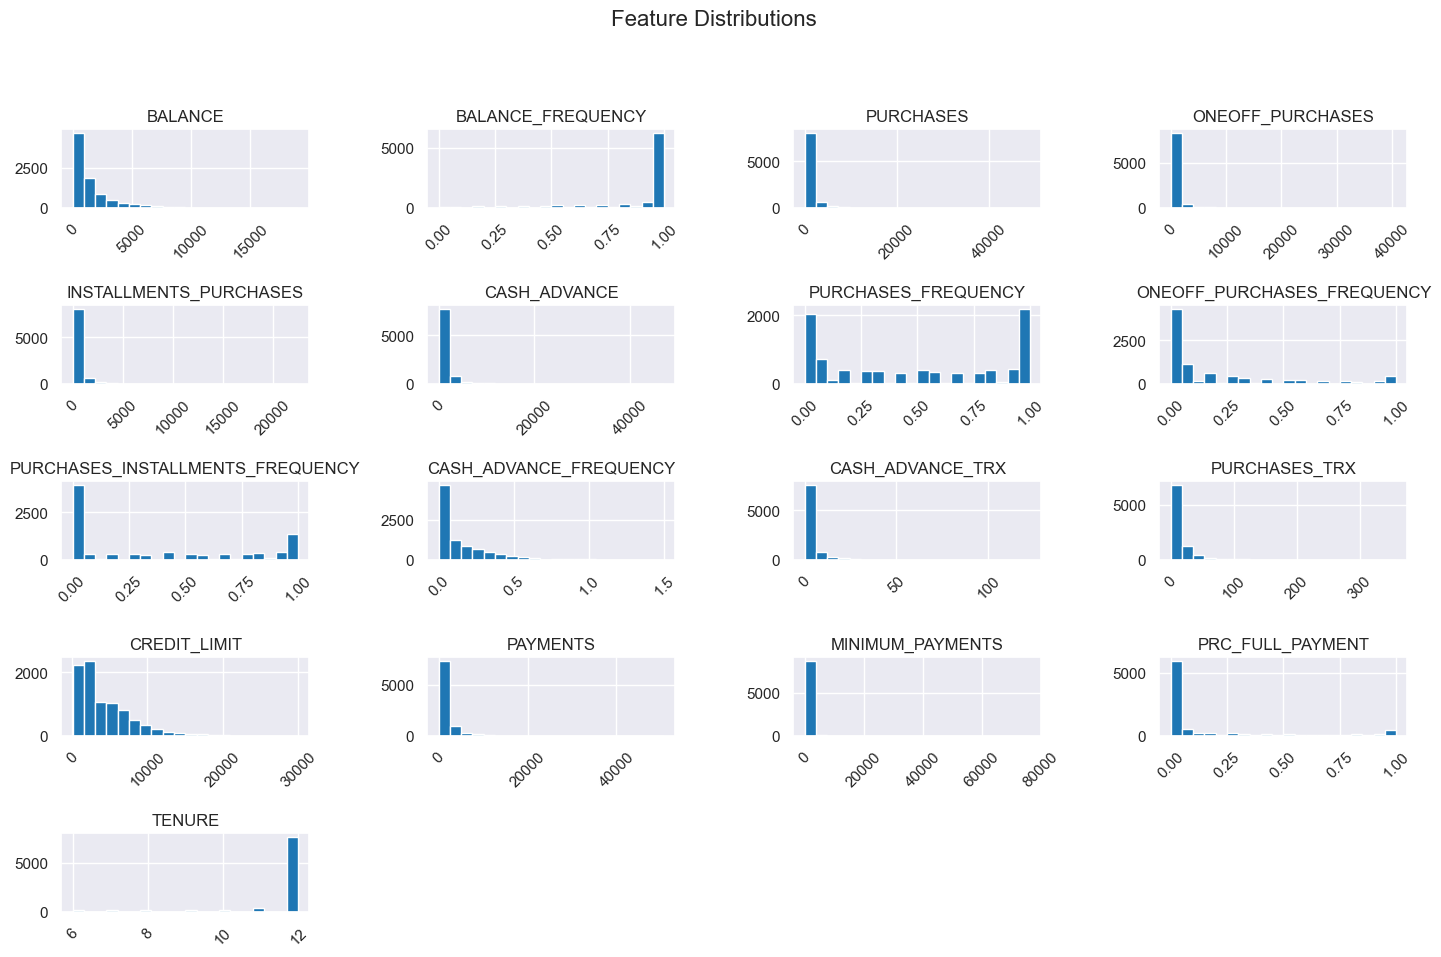

In [282]:
# Exploring the distribution of all features
axes = df.hist(bins=20, figsize=(15, 10), color='#1f77b4')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(pad=3)
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)  
plt.show()

In [283]:
# Customers who have done ONEOFF_PURCHASES purchase and who don't
total_customers=df['CUST_ID'].count()
num_onetimepurchese=df[df['ONEOFF_PURCHASES']>0]['CUST_ID'].count()
print(f'Total number of customers who have done one time purchese is {num_onetimepurchese}')
num_dont_onetimepurchese=total_customers-num_onetimepurchese
print(f'Total number of customers who have done one time purchese is {num_dont_onetimepurchese}')

Total number of customers who have done one time purchese is 4648
Total number of customers who have done one time purchese is 4302


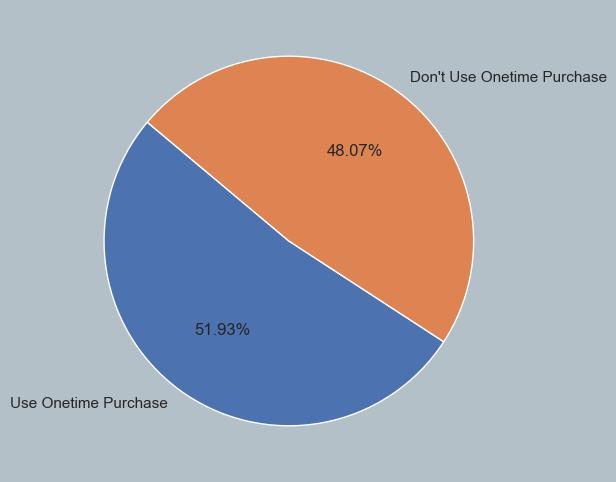

In [284]:
#Ploting a pie chart of the customer's who have done and who never done ONEOFF_PURCHASES
onetime_purchese_cnt=[num_onetimepurchese,num_dont_onetimepurchese]
plt.figure(figsize=(8,6),facecolor='#b3c0c7')
labels=['Use Onetime Purchase',"Don't Use Onetime Purchase"]
color=['#fcb103','#252729']
plt.pie(onetime_purchese_cnt, autopct='%1.2f%%',labels=labels,startangle=140)
plt.show()

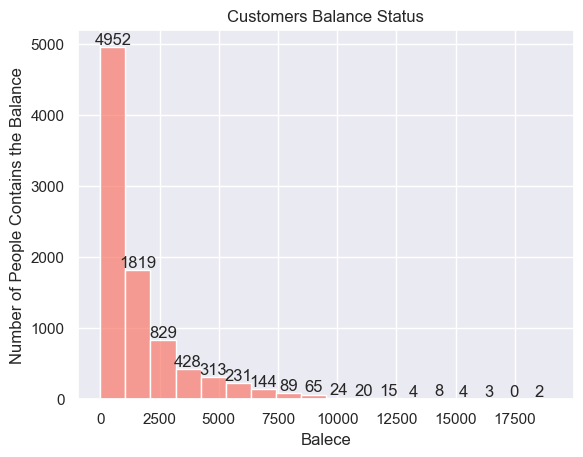

In [285]:
# Ploting a histogram 
cnt_ax=sns.histplot(data=df,x='BALANCE',binwidth=1050,color='salmon')
for container in cnt_ax.containers:#type: ignore
    cnt_ax.bar_label(container)
plt.title('Customers Balance Status')
plt.ylabel('Number of People Contains the Balance')
plt.xlabel('Balece')
plt.show()

*Key Insights*
- Total 4952 (55.32%) customer's have balence below 1050. Means most of the persons have very less money.

- Only 9 customer's have balence obove 150000.

In [286]:
# Just Want to see the customers who have done one time purchase OR Installment Purchases
dataset_onetimeoff=df[df['ONEOFF_PURCHASES']>0]
dataset_installment=df[df['INSTALLMENTS_PURCHASES']>0]

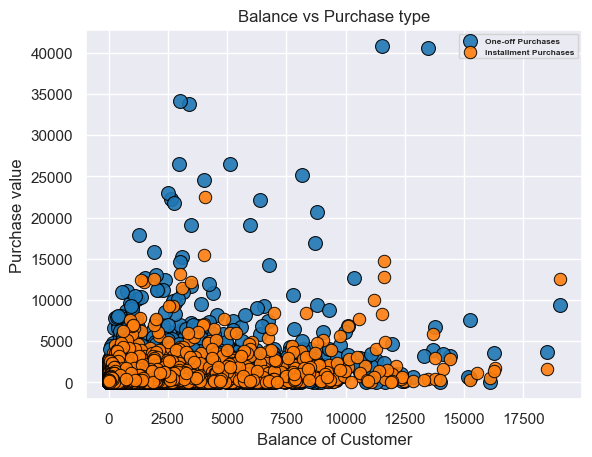

In [287]:
sns.scatterplot(
    data=dataset_onetimeoff,
    x='BALANCE', 
    y='ONEOFF_PURCHASES',
    color='#1f77b4',  # Deep blue
    s=100,
    edgecolor='black',
    marker='o',  
    alpha=0.9,
    label='One-off Purchases'
)

sns.scatterplot(
    data=dataset_installment,
    x='BALANCE',
    y='INSTALLMENTS_PURCHASES',
    s=80,
    color='#ff7f0e',  # Vibrant orange
    marker='o',
    edgecolor='black', 
    alpha=0.9,
    label='Installment Purchases'
)


plt.title('Balance vs Purchase type')
plt.xlabel('Balance of Customer')
plt.ylabel('Purchase value')

legend = plt.legend(
    loc='upper right',
    prop={'size': 6, 'weight': 'bold'},
    title_fontsize=6
)


plt.show()



*Key insights*:
- We can see that if the customer balence is 0 or near 0 they do prefer installment purchase.
- In most of the cases when Purchase value is high then customers preffer oneoff purchase.

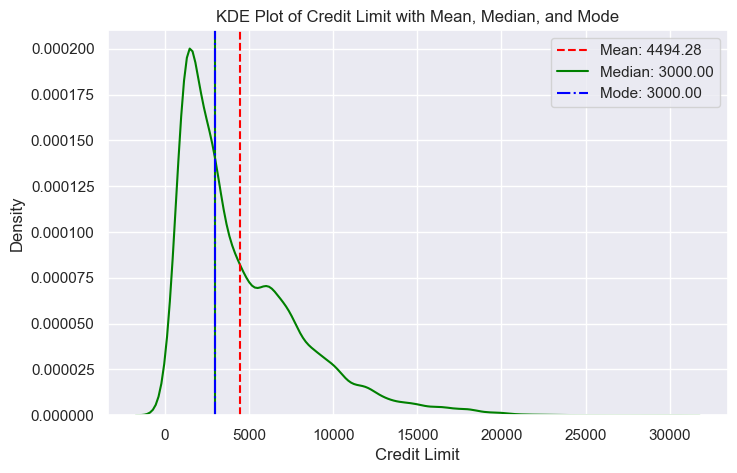

In [288]:
#Credit limit distribution
credit_limit = df['CREDIT_LIMIT']
mean_val = credit_limit.mean()
median_val = credit_limit.median()
mode_val = credit_limit.mode()[0]

plt.figure(figsize=(8, 5))  # Create figure first

# KDE plot
sns.kdeplot(credit_limit, color='green') #type:ignore

# Add lines for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='-.', label=f'Mode: {mode_val:.2f}')

# Add legend and labels
plt.legend()
plt.title('KDE Plot of Credit Limit with Mean, Median, and Mode')
plt.xlabel('Credit Limit')
plt.ylabel('Density')
plt.grid(True)

In this distribution, the median and mode are both 3000.0, while the mean is 4494.28. Since the mean is greater than the median, the data is positively skewed (right-skewed), indicating a longer tail on the right side of the distribution. This suggests that a small number of high values are pulling the mean upward compared to the median.

C:\Users\msoum\AppData\Local\Temp\ipykernel_15116\2658291585.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='TENURE',palette='Dark2')


<Axes: xlabel='TENURE', ylabel='count'>

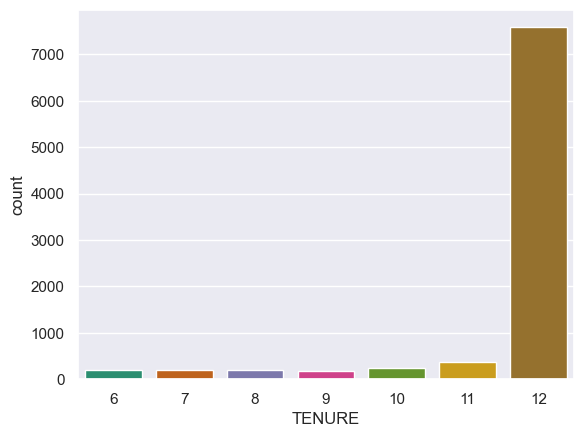

In [289]:
sns.countplot(data=df,x='TENURE',palette='Dark2')

*Key Insights*:

The majority of customers have a TENURE of 12 months, indicating that most people are given — or choose — the maximum available repayment period. In contrast, very few customers have a tenure of 6, 7, 8, or 9 months. This suggests that the common repayment preference or policy favors a full 12-month period, possibly because it provides greater flexibility in managing repayments, reduces monthly payment amounts, and makes it easier for customers to meet their obligations without financial strain.

Text(0, 0.5, 'Percentage of Full Payment')

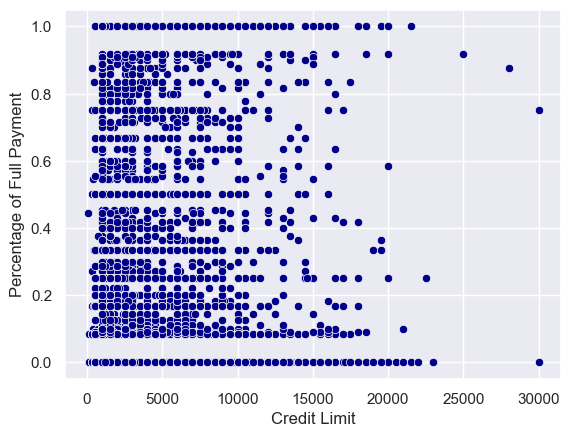

In [290]:
#Ploting the CREDIT_LIMIT and PRC_FULL_PAYMENT
sns.scatterplot(data=df,x='CREDIT_LIMIT',y='PRC_FULL_PAYMENT',color='darkblue')
plt.xlabel('Credit Limit')
plt.ylabel('Percentage of Full Payment')

Plotting the relationship between CREDIT_LIMIT and PRC_FULL_PAYMENT — This visualization helps in understanding how the percentage of full payments made by customers varies with their assigned credit limit. By observing the trend, we can identify whether customers with higher credit limits tend to make full payments more frequently or if the repayment behavior is independent of the credit limit.

C:\Users\msoum\AppData\Local\Temp\ipykernel_15116\729177382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df,palette='Dark2');


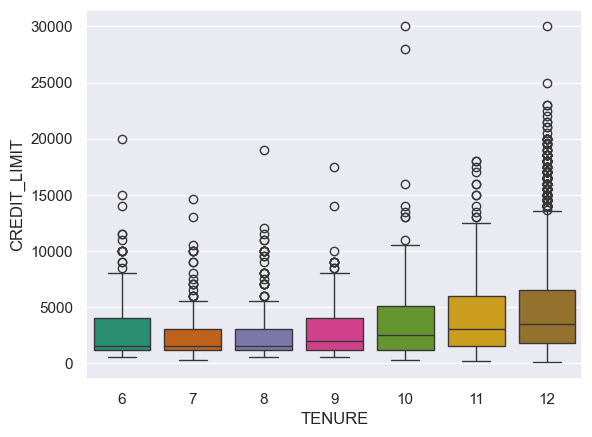

In [291]:
#Box plot of TENURE and CREDIT_LIMIT
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df,palette='Dark2');

##### *Buisness Insights*
| Insight                               | Why It Matters                                        |
| ------------------------------------- | ----------------------------------------------------- |
|  Higher tenure → Higher limits      | Shows customer loyalty is rewarded                    |
|  High variance in long tenure       | Bank trusts long-term customers with variable needs   |
|  Targeted offers possible           | Banks can create tenure-based reward programs         |
|  Risk watch for high-limit outliers | Important for fraud detection or credit risk modeling |


In [292]:
numeric_cols=df.columns[1:17] # Extracting the numerical columns

Text(0.5, 1.0, 'Correlation Heatmap')

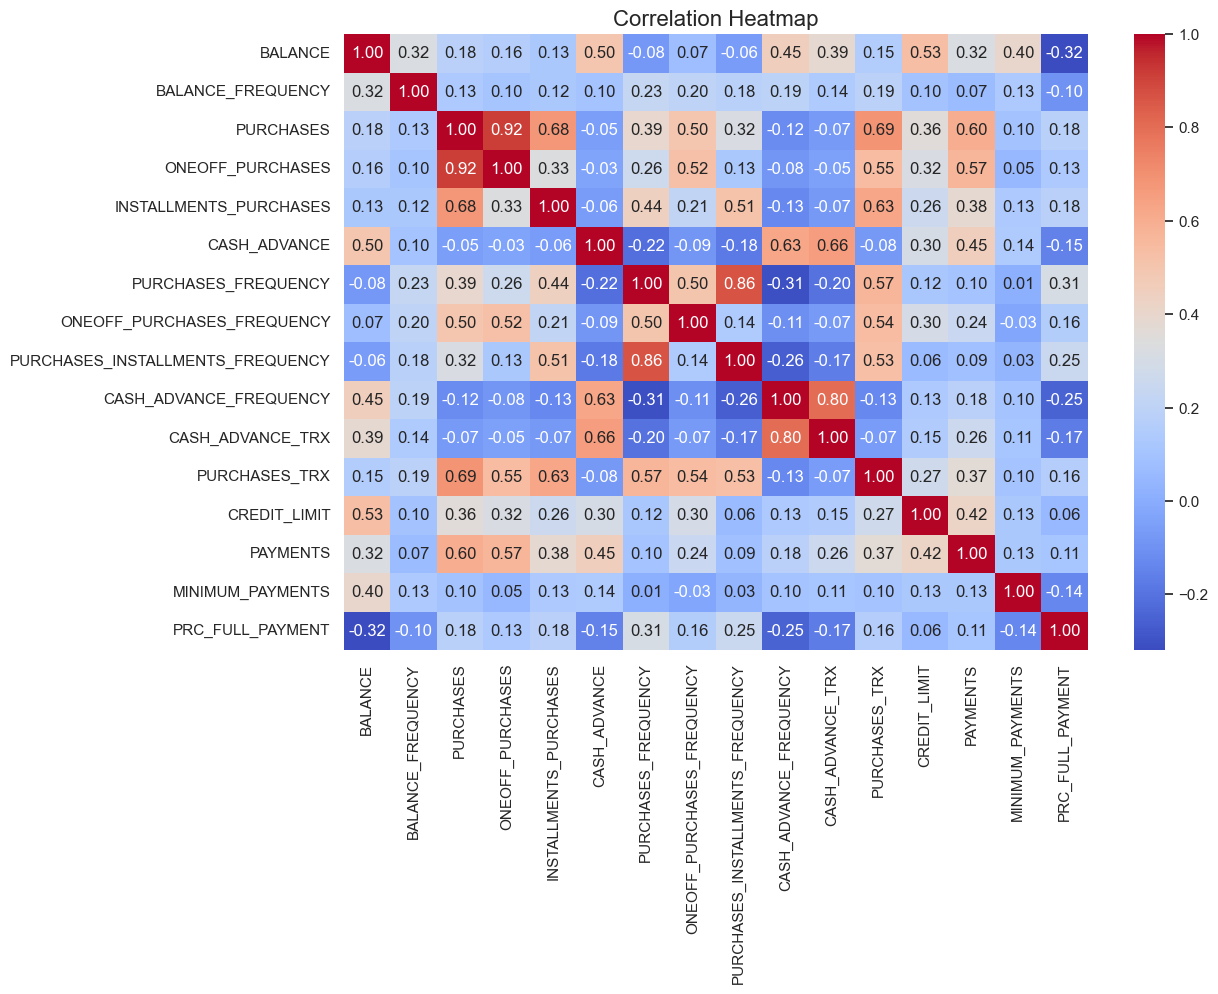

In [293]:
# Coorelation heat map to better understand the relation between the features
data=df[numeric_cols]
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)


We can observe several *interesting correlations* from the data:
- CREDIT_LIMIT and BALANCE (0.53) — A moderate positive relationship, indicating that customers with higher credit limits tend to maintain higher balances.
- CASH_ADVANCE and BALANCE (0.50) — Suggests that customers who take more cash advances generally have higher outstanding balances.
- PURCHASES and INSTALLMENTS_PURCHASES (0.69) — Shows a strong positive correlation, but it is still lower than the relationship between PURCHASES and ONEOFF_PURCHASES (0.92). This indicates that customers tend to prefer one-off purchases over installment purchases.
- PURCHASE_FREQUENCY and PURCHASE_INSTALLMENT_FREQUENCY (0.68) — Implies that customers who purchase more frequently also tend to use installment purchases more often.
- BALANCE and PRC_FULL_PAYMENT (-0.32) — A moderate negative correlation, suggesting that customers with higher balances are less likely to make full payments, possibly due to financial constraints or payment habits.
- PURCHASE_FREQUENCY and CASH_ADVANCE_FREQUENCY(-0.31) — Another moderate negative correlation, suggesting that customers pays advance cash frequently have less tendency to purchase product frequently.

Let's find some more insights

In [294]:
# customers with high balence 
highbalance_cst=df[df['BALANCE']>10000].loc[:,['CUST_ID','BALANCE']]
print(f'Total number of people who have higher balance is {highbalance_cst.shape[0]}')
highbalance_cst.sort_values(by='BALANCE',ascending=False)

Total number of people who have higher balance is 66


,CUST_ID,BALANCE
138,C10144,19043.13856
4140,C14256,18495.55855
5488,C15642,16304.88925
6629,C16812,16259.44857
5281,C15429,16115.59640
...,...,...
5737,C15897,10243.14763
853,C10884,10131.00055
3510,C13610,10124.47214
4102,C14218,10116.70899


#### Data Preprocessing

We will select all numerical features for clustering

In [295]:
clusture_df=df[numeric_cols]  #Extarcting the required features
clusture_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


#### Outliers Detection and Removal

**Visualizing the Outliers**:
To visualize the outliers, we use a boxplot.

**Concept**:
Outliers are data points whose values are significantly higher or lower than most of the observations in the dataset.
In a boxplot, any data point that lies outside the whiskers (beyond 1.5 × IQR from the first or third quartile) is considered an outlier.
These points appear as individual dots or markers, clearly indicating values that deviate from the general data distribution.

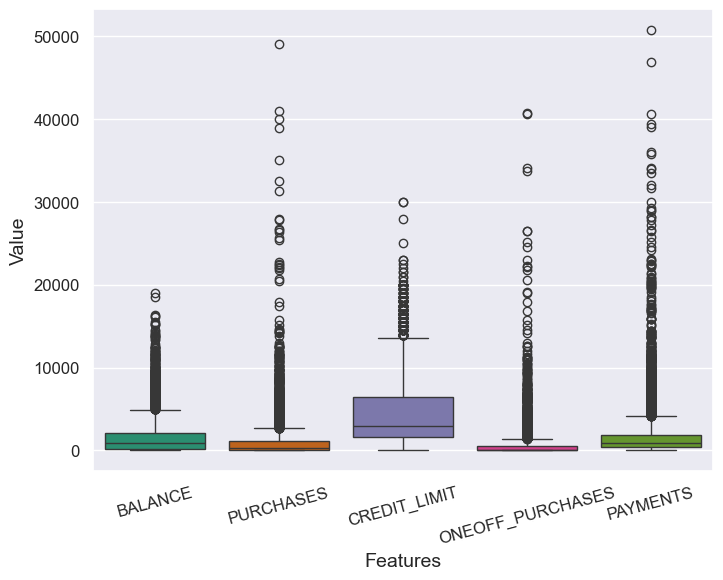

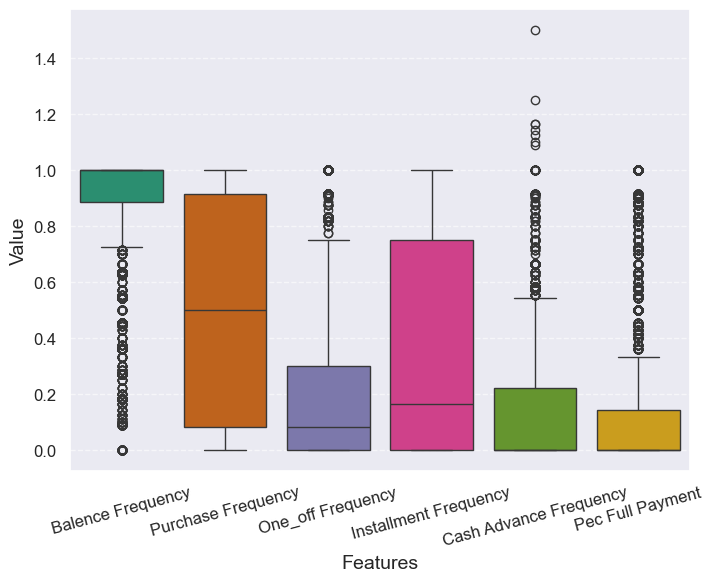

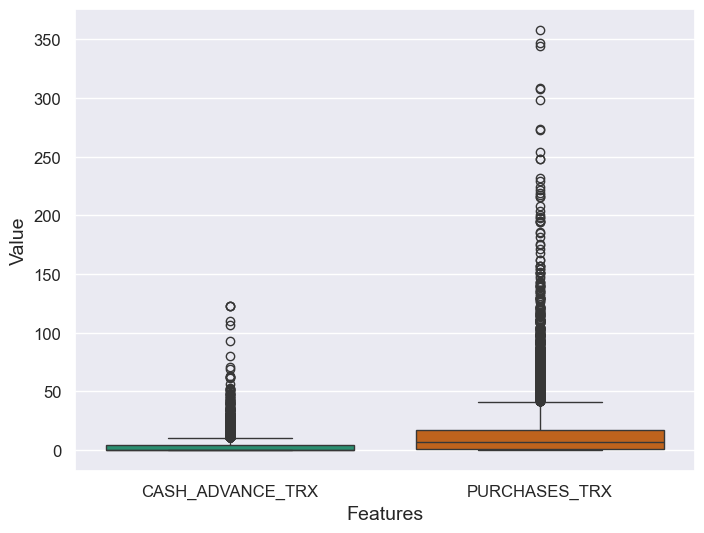

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
'''Here We can't Plot all features in a single plot because the have significant difference in their range. Like all features related to Cash and Balence has very high range but the fetures related to 
   frequency have range between 0 to 1. While Transaction related features have small integer range <500.
'''
# Boxplot of features related to Balence and Cash
plt.figure(figsize=(8,6))
sns.boxplot(data=clusture_df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT','ONEOFF_PURCHASES','PAYMENTS']],palette='Dark2')
plt.xticks(fontsize=12,rotation=15)
plt.yticks(fontsize=12)
plt.ylabel("Value", fontsize=14)
plt.xlabel("Features", fontsize=14)
plt.show()
# Boxplot of features related to  frequency 
plt.figure(figsize=(8,6))
sns.boxplot(data=clusture_df[['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']],palette='Dark2')
labels=['Balence Frequency','Purchase Frequency','One_off Frequency','Installment Frequency','Cash Advance Frequency','Pec Full Payment']
plt.xticks(ticks=range(len(labels)), labels=labels, fontsize=12, rotation=15)
plt.yticks(fontsize=12)
plt.ylabel("Value", fontsize=14)
plt.xlabel("Features", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
# Boxplot of features related to transaction
plt.figure(figsize=(8,6))
sns.boxplot(data=clusture_df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX']],palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Value", fontsize=14)
plt.xlabel("Features", fontsize=14)
plt.show()
plt.figure(figsize=(12,6))

		



**Removal of Outliers**: To remove outliers we will use z-score method. Z-score method is a very standard method to calculate the distance of any point from mean.

**concept**: We calculate the z-score as Z-score=(x−μ)/σ, here μ is the mean and σ is the standard deviation. If Z-score is >3 then We generally consider as an outlier. 

In [297]:

z_scors=np.abs(stats.zscore(clusture_df))
z_scors

array([[0.73198937, 0.24943448, 0.42489974, ..., 0.52897879, 0.3024    ,
        0.52555097],
       [0.78696085, 0.13432467, 0.46955188, ..., 0.81864213, 0.09749953,
        0.2342269 ],
       [0.44713513, 0.51808382, 0.10766823, ..., 0.38380474, 0.0932934 ,
        0.52555097],
       ...,
       [0.7403981 , 0.18547673, 0.40196519, ..., 0.5706145 , 0.32687479,
        0.32919999],
       [0.74517423, 0.18547673, 0.46955188, ..., 0.58053567, 0.33830497,
        0.32919999],
       [0.57257511, 0.88903307, 0.04214581, ..., 0.57686873, 0.3243581 ,
        0.52555097]])

In [298]:
filtered_zscore=(z_scors<3).all(axis=1)
filtered_df=clusture_df[filtered_zscore]
filtered_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


#### Data Standarization

The process of converting data into a consistent format to improve data quality, enable easier analysis, and facilitate integration across different systems. 

Here, we will use StandardScaler module from Scikit-learn library to standarize our data.

In [299]:
features=StandardScaler().fit(clusture_df.values)
scaled=features.transform(clusture_df.values)
scaled_features=pd.DataFrame(scaled,columns=clusture_df.columns)
scaled_features

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200


#### Dimensional Reduction


Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving its most important information.
Here, we will use Principle Component Analysis technique to reuduce our 17 numerical feature to 2 dimension.

Text(0.5, 1.0, 'PCA Projection of Customers')

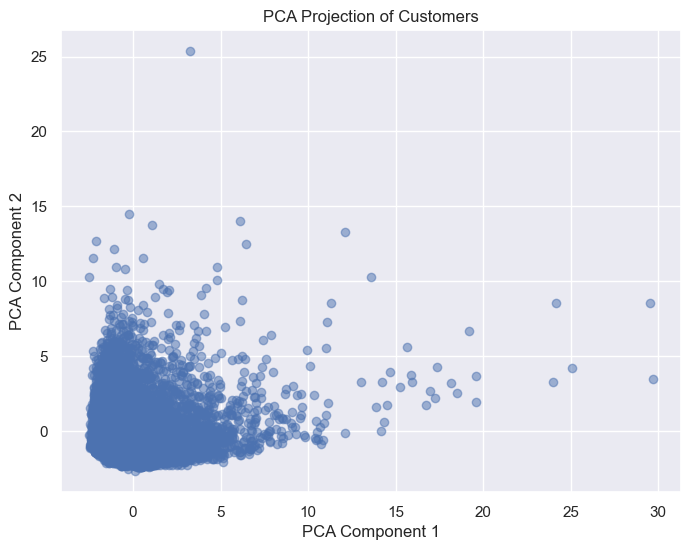

In [300]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Customers")


#### Clusturing the data

**Algorithm**: To determine the optimal number of clusters, we use the K-Means algorithm.

**Concept** : K-Means is one of the most widely used techniques for clustering large datasets. The process begins by randomly selecting a set of k centroids. Each data point is then assigned to the cluster with the nearest centroid. The centroid of each cluster is recalculated as the mean of all points in that cluster. This process of assignment and centroid update continues until the centroids and clusters remain stable without significant changes.
 

Before clustering, we need to determine the optimal number of clusters. To achieve this, we use the Elbow method. In the Elbow graph, the point where the rate of decrease in the within-cluster variance slows down noticeably — forming an “elbow” shape — is considered the optimal number of clusters.

In [301]:
#function to plot Elbow grarh
# for our dataset it is not logical to make more than 10 clustres. So, the range will be (2,11)
def find_k(df_scaled, k_range=range(2,11)):
    inertias=[]
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=10)
        labels = kmeans.fit_predict(df_scaled)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(12,4))
    plt.plot(k_range, inertias, marker='o')
    plt.title('Elbow Plot')
    plt.show()
    return pd.DataFrame({'k': list(k_range), 'inertia': inertias})

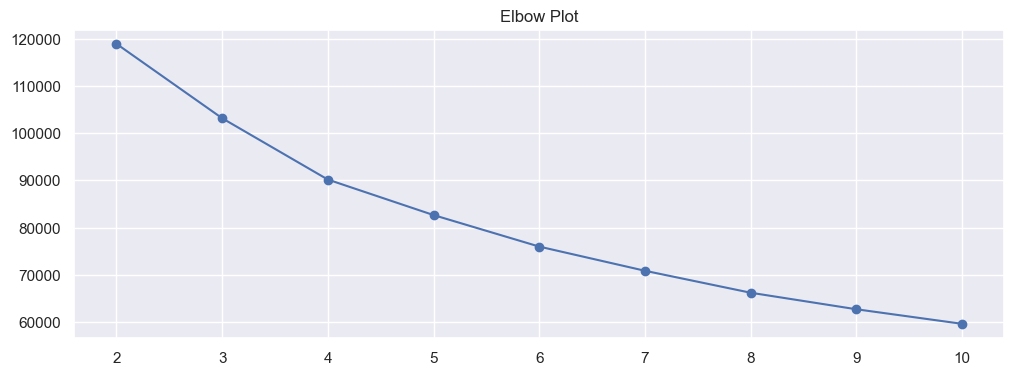

,k,inertia
0,2,118899.217979
1,3,103156.525809
2,4,90184.702521
3,5,82678.271053
4,6,76009.424103
5,7,70895.830895
6,8,66251.785732
7,9,62755.564330
8,10,59675.648713


In [302]:
#calling the function
wcss=find_k(scaled_features)
wcss

In our Elbow graph we can notice the sharp drop at 4. So, the optimal number of clustre will be 4.

In [303]:
# Fit the standard data into the model
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster']

0       1
1       1
2       2
3       1
4       1
       ..
8945    3
8946    2
8947    2
8948    1
8949    2
Name: Cluster, Length: 8950, dtype: int32

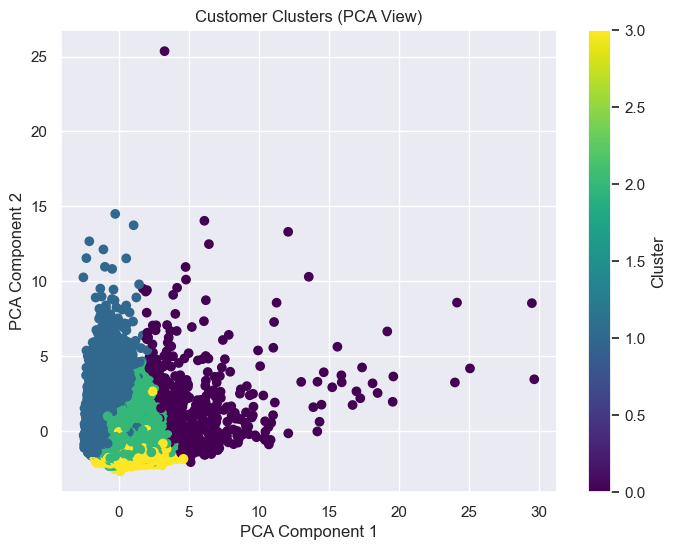

In [304]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Cluster'], cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters (PCA View)")
plt.colorbar(label="Cluster")


In [305]:
cluster_summary = df[numeric_cols].groupby(df['Cluster']).mean()
cluster_summary


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
Cluster,,,,,,,,,,,,,,,,
0,4171.811246,0.987145,6867.332195,4504.861408,2363.713023,1829.030791,0.938625,0.692763,0.786993,0.145734,4.726708,82.159420,9948.964803,7611.565678,2381.691499,0.217539
1,1909.868290,0.846203,229.748585,188.098225,41.804896,1566.293498,0.130573,0.077830,0.052349,0.218142,5.258701,2.342227,4199.339802,1483.063080,891.864114,0.031128
2,1240.828922,0.932336,1117.398118,562.706274,555.138822,360.327393,0.836052,0.283452,0.665550,0.064310,1.339973,20.627747,3954.608759,1273.767132,809.019898,0.055967
3,114.247971,0.813402,1138.700474,543.905534,594.890506,62.229909,0.753356,0.254244,0.576620,0.009387,0.182329,17.515663,4661.448095,1392.802801,170.086981,0.781957


## Explanation of Clustres
=> Here, I am considering the currency is $.
#### Cluster 0: 
  - High average balance (~$4,172)

  - High purchase amount (₹6,867), mostly one-off purchases ($4,505)

  - High purchase frequency (~94%), both one-off and installments

  - Credit limit is highest (~$9,949)

  - Payments are large (₹7,612), with decent minimum payments ($2,382)

  - Full payment ratio ~21% — they sometimes carry balances

Conclusion: Premium customers, high-value spenders, mix of one-off and installment purchases, strong revenue generators for the bank.

#### Cluster 1: 
  - Low balance (~$1,910)

  - Very low purchases (~$230) and purchase frequency (~13%)

  - Low credit limit (~$4,199)

  - Cash advance is significant (~$1,566) relative to their spend

  - Full payment ratio is lowest (~3%)

Conclusion: Low-engagement customers, primarily using cash advances, minimal card spending. Possibly a credit risk group.
#### Cluster 2:
Moderate balance (~$1,241)

  - Purchases ($1,117), almost evenly split between one-off ($563) and installments (~$555)

  - Purchase frequency (~84%) is high

  - Low cash advance (~$360)

  - Credit limit (~$3,955)

  - Full payment ratio (~5.6%)

Conclusion: Regular users who make moderate purchases, balanced payment style, mostly safe customers.
#### Cluster 3: 
  - Very low balance (~$114)

  - Purchases ($1,139), mostly one-off ($544) and installments (~$595)

  - High full payment ratio (~78%) — they pay off almost everything

  - Credit limit (~$4,661)

  - Very low cash advance (~$62)

Conclusion: Low debt customers, make purchases and clear dues fully, very low risk.



**Final conclusion** : We have analized the data and segregate our customers into four different clustures according to past, present, future conditions.

#### Clusture Summary 
- **Clusture 0** : High spenders with balanced usage, Premium customers
- **Clusture 1** : Low activity, low spend,Low-engagement customers
- **Clusture 2** : Moderate spenders with installment preference,regular users.
- **Clusture 3** : Low balance but high one-off purchases.

## Business Insights 
Cluster 0: Focus for premium offers, loyalty programs, and high-value rewards — they’re the most profitable.

Cluster 1: Educate about card benefits, encourage purchases instead of cash advances, possibly reduce risk exposure.

Cluster 2: Encourage more one-off spending through targeted promotions and rewards.

Cluster 3: Maintain engagement with cashback offers, but profitability is lower since they pay in full.